In [1]:
import os
import numpy as np
import pandas as pd
import datetime
from df_preliminary import preprocessing_df, processing_for_tfidf
%load_ext autoreload
%autoreload 2

## EDA

In [2]:
new_directory = '/Users/vasevooo/projects/GameBuddy'
os.chdir(new_directory)

df = pd.read_csv('./data/SteamGamesDF.csv')
games = pd.read_csv('./data/games_df_no_reviews.csv')


In [3]:
df.shape

(8700, 15)

In [4]:
df.describe()

,Unnamed: 0,DLC,Mature,Single,Total Review Cnt,Pos Review Cnt,Neg Review Cnt,Score
count,8700.000000,8700.000000,8700.000000,8596.000000,25.000000,25.000000,25.000000,8700.000000
mean,4349.500000,0.354483,0.218736,0.932759,64033.160000,63099.200000,933.960000,0.771065
std,2511.618004,0.478384,0.413413,0.250453,141396.259549,139138.165985,2289.265448,0.118651
min,0.000000,0.000000,0.000000,0.000000,573.000000,569.000000,2.000000,0.335009
25%,2174.750000,0.000000,0.000000,1.000000,1018.000000,1013.000000,6.000000,0.705133
50%,4349.500000,0.000000,0.000000,1.000000,2441.000000,2426.000000,17.000000,0.792386
75%,6524.250000,1.000000,0.000000,1.000000,13541.000000,13442.000000,99.000000,0.861034
max,8699.000000,1.000000,1.000000,1.000000,577329.000000,567069.000000,10260.000000,0.977108


In [5]:
df.head(2)

,Unnamed: 0,Name,Date,Developer,Publisher,Genre,Price,Langs,DLC,Mature,Single,Total Review Cnt,Pos Review Cnt,Neg Review Cnt,Score
0,0,Senren＊Banka,"14 Feb, 2020",YUZUSOFT,HIKARI FIELD,"['Adventure', 'Casual']","29,99€","['English', 'Japanese', 'Simplified Chinese', ...",0,1,1.0,14158.0,14033.0,125.0,0.963524
1,1,A Short Hike,"30 Jul, 2019",adamgryu,adamgryu,"['Adventure', 'Indie']","6,59€","['English', 'French', 'Spanish - Latin America...",0,0,1.0,13541.0,13442.0,99.0,0.964582


In [6]:
games.head(2)

,Unnamed: 0,Name,Date,Developer,Publisher,Genre,Price,Langs,DLC,Mature,Single,Total Review Cnt,Pos Review Cnt,Neg Review Cnt,Score,appid,description,Tags
0,0.0,Senren＊Banka,"14 Feb, 2020",YUZUSOFT,HIKARI FIELD,"['Adventure', 'Casual']","29,99€","['English', 'Japanese', 'Simplified Chinese', ...",0.0,1.0,1.0,14158.0,14033.0,125.0,0.963524,1144400.0,Senren＊Banka is a Japanese-style visual novel ...,"['Visual Novel', 'Casual', 'Adventure', 'Datin..."
1,1.0,A Short Hike,"30 Jul, 2019",adamgryu,adamgryu,"['Adventure', 'Indie']","6,59€","['English', 'French', 'Spanish - Latin America...",0.0,0.0,1.0,13541.0,13442.0,99.0,0.964582,1055540.0,"Hike, climb, and soar through the peaceful mou...","['Adventure', 'Exploration', 'Indie', 'Cute', ..."


In [7]:
nan_counts = games.isna().sum()
print(nan_counts)

Unnamed: 0             0
Name                   0
Date                   0
Developer              4
Publisher              0
Genre                  0
Price                  0
Langs                  0
DLC                    0
Mature                 0
Single                85
Total Review Cnt    7510
Pos Review Cnt      7510
Neg Review Cnt      7510
Score                  0
appid                  0
description         3725
Tags                   6
dtype: int64


In [8]:
games.columns

Index(['Unnamed: 0', 'Name', 'Date', 'Developer', 'Publisher', 'Genre',
       'Price', 'Langs', 'DLC', 'Mature', 'Single', 'Total Review Cnt',
       'Pos Review Cnt', 'Neg Review Cnt', 'Score', 'appid', 'description',
       'Tags'],
      dtype='object')

In [9]:
games['Date']

0       14 Feb, 2020
1       30 Jul, 2019
2       31 Mar, 2023
3       17 Sep, 2021
4       11 Apr, 2022
            ...     
7528    17 Mar, 2016
7529    16 Feb, 2023
7530    28 Jan, 2016
7531    13 Feb, 2018
7532     1 Oct, 2018
Name: Date, Length: 7533, dtype: object

In [10]:
preprocessed_df = preprocessing_df(games)
preprocessed_df.head(2)

preprocessing of the df is done


,Name,Date,Developer,Publisher,Genre,Langs,DLC,Mature,Single,Score,appid,description,Tags,Year
0,Senren＊Banka,2020-02-14,YUZUSOFT,HIKARI FIELD,"['Adventure', 'Casual']","['English', 'Japanese', 'Simplified Chinese', ...",0.0,1.0,1.0,0.963524,1144400,Senren＊Banka is a Japanese-style visual novel ...,"['Visual Novel', 'Casual', 'Adventure', 'Datin...",2020.0
1,A Short Hike,2019-07-30,adamgryu,adamgryu,"['Adventure', 'Indie']","['English', 'French', 'Spanish - Latin America...",0.0,0.0,1.0,0.964582,1055540,"Hike, climb, and soar through the peaceful mou...","['Adventure', 'Exploration', 'Indie', 'Cute', ...",2019.0


In [11]:
preprocessed_df[preprocessed_df['Date'].isna()]

,Name,Date,Developer,Publisher,Genre,Langs,DLC,Mature,Single,Score,appid,description,Tags,Year


In [12]:
unique_languages = set()
for langs in preprocessed_df['Langs']:
    if isinstance(langs, str) and langs.strip():
        langs = langs.strip("'")  # Remove leading and trailing single quotes
        langs = langs.replace("'", "")  # Remove all remaining single quotes
        langs = langs.strip()  # Remove leading and trailing spaces
        
        langs = langs.rstrip(']')  # Remove trailing brackets
        langs = langs.lstrip('[')  # Remove trailing brackets
        unique_languages.update(langs.split(', '))

unique_languages = list(unique_languages)

print(unique_languages)

language_counts = {}

for lang in unique_languages:
    language_counts[lang] = preprocessed_df['Langs'].str.contains(lang).sum()

lang_df = pd.DataFrame.from_dict(language_counts, orient='index')

lang_df.sort_values(by=0, ascending=False).head(15)

['', 'Simplified Chinese', 'Portuguese - Brazil', 'Irish', 'Spanish - Spain', 'Slovenian', 'Galician', 'Malay', 'Yoruba', 'Sinhala', 'German', 'Tatar', 'Persian', 'Korean', 'Turkish', 'Kinyarwanda', 'Swedish', 'Tigrinya', 'Turkmen', 'Mongolian', 'Odia', 'Xhosa', 'Gujarati', 'Tajik', 'Belarusian', 'Finnish', 'Czech', 'Maltese', 'Uyghur', 'Estonian', 'English', 'Zulu', 'Hebrew', 'Welsh', 'Punjabi (Gurmukhi)', 'Slovak', 'Khmer', 'Armenian', 'Wolof', '"Kiche"', 'Telugu', 'Assamese', 'Quechua', 'Kazakh', 'Italian', 'Norwegian', 'Greek', 'Ukrainian', 'Indonesian', 'Dutch', 'Arabic', 'Kannada', 'Dari', 'Sindhi', 'Nepali', 'Albanian', 'Malayalam', 'Marathi', 'Kyrgyz', 'Georgian', 'Russian', 'Filipino', 'Bangla', 'Cherokee', 'Afrikaans', 'Amharic', 'Tswana', 'Portuguese - Portugal', 'Punjabi (Shahmukhi)', 'Spanish - Latin America', 'Romanian', 'Traditional Chinese', 'Lithuanian', 'Serbian', 'Azerbaijani', 'Urdu', 'Bulgarian', 'Luxembourgish', 'Latvian', 'Vietnamese', 'Japanese', 'Maori', 'Sotho

/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_53712/1090557772.py:19: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  language_counts[lang] = preprocessed_df['Langs'].str.contains(lang).sum()


,0
,7519
English,7413
German,5044
French,5011
Spanish - Spain,4643
Simplified Chinese,4512
Japanese,4301
Russian,4172
Italian,3703
Korean,3171


In [13]:
unique_genres = set()
for genre in preprocessed_df['Genre']:
    if isinstance(genre, str) and genre.strip():
        genre = genre.strip("'")  # Remove leading and trailing single quotes
        genre = genre.replace("'", "")  # Remove all remaining single quotes
        genre = genre.strip()  # Remove leading and trailing spaces
        
        genre = genre.rstrip(']')  # Remove trailing brackets
        genre = genre.lstrip('[')  # Remove trailing brackets
        unique_genres.update(genre.split(', '))

unique_genres = list(unique_genres)

print(unique_genres)


genres_counts = {}

for genre in unique_genres:
    genres_counts[genre] = preprocessed_df['Genre'].str.contains(genre).sum()

genre_df = pd.DataFrame.from_dict(genres_counts, orient='index')

genre_df.sort_values(by=0, ascending=False).head(15)


['', 'Animation & Modeling', 'Sports', 'Action', 'Racing', 'Utilities', 'Education', 'RPG', 'Free to Play', 'Early Access', 'Adventure', 'Web Publishing', 'Strategy', 'Video Production', 'Audio Production', 'Massively Multiplayer', 'Photo Editing', 'Game Development', 'Software Training', 'Casual', 'Design & Illustration', 'Simulation', 'Indie']


,0
,7519
Indie,3528
Action,3480
Adventure,2794
Simulation,2356
Strategy,1920
RPG,1863
Casual,1438
Early Access,593
Sports,363


In [14]:
unique_tags = set()
for tag in preprocessed_df['Tags']:
    if isinstance(tag, str) and tag.strip():
        tag = tag.strip("'")  # Remove leading and trailing single quotes
        tag = tag.replace("'", "")  # Remove all remaining single quotes
        tag = tag.strip()  # Remove leading and trailing spaces
        tag = tag.rstrip(']')  # Remove trailing brackets
        tag = tag.lstrip('[')  # Remove trailing brackets
        unique_tags.update(tag.split(', '))

unique_tags = list(unique_tags)

print(unique_tags)

tags_counts = {}

for tag in unique_tags:
    tags_counts[tag] = preprocessed_df['Tags'].str.contains(tag).sum()

tag_df = pd.DataFrame.from_dict(tags_counts, orient='index')

tag_df.sort_values(by=0, ascending=False).head(15)



['', 'Cricket', 'Unforgiving', 'God Game', 'TrackIR', 'Collectathon', 'Detective', 'Noir', 'Trivia', 'Voice Control', 'Science', 'Jump Scare', 'Precision Platformer', 'Hex Grid', 'Mahjong', 'Medieval', 'Automation', 'Crowdfunded', 'Birds', 'Combat', 'Horses', 'Resource Management', 'Arena Shooter', 'Strategy RPG', 'America', 'Real-Time with Pause', 'Voxel', 'Illuminati', '"Beat em up"', 'Dark', 'Lemmings', 'Experience', 'Combat Racing', 'Management', 'Metroidvania', 'Trading', 'Pixel Graphics', 'Realistic', 'Asynchronous Multiplayer', 'Ninja', 'Post-apocalyptic', 'Programming', 'Heist', 'Motocross', 'Wargame', 'On-Rails Shooter', 'Memes', 'Stealth', 'Perma Death', 'Trading Card Game', 'Reboot', 'Online Co-Op', 'Hunting', 'Boxing', 'Early Access', 'Psychedelic', 'Adventure', 'Psychological', 'Parkour', 'Spaceships', 'Rhythm', 'Cooking', 'Cinematic', 'Multiple Endings', 'Open World', 'Level Editor', 'Cozy', 'Immersive', 'LEGO', 'Cartoony', 'Medical Sim', 'Animation & Modeling', 'Board Ga

/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_53712/3830682591.py:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tags_counts[tag] = preprocessed_df['Tags'].str.contains(tag).sum()


,0
,7519
Singleplayer,4497
Action,3924
Adventure,3458
Indie,3010
Simulation,2481
RPG,2192
Multiplayer,2187
Strategy,2183
Atmospheric,1782


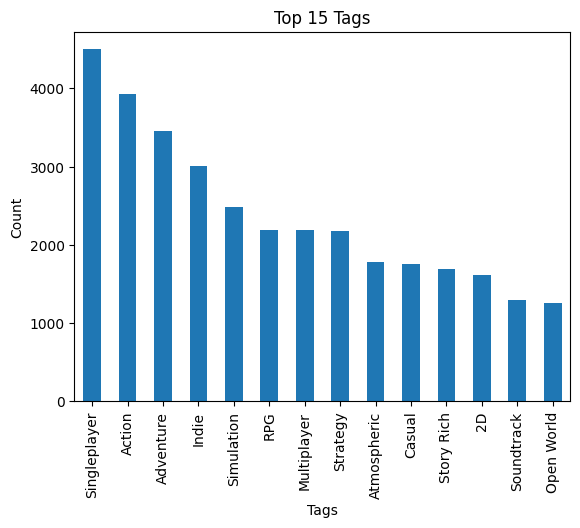

In [15]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called tag_df
top_k = 15
top_tags = tag_df.sort_values(by=0, ascending=False).iloc[1:top_k]

top_tags.plot(kind='bar', legend=False)
plt.xlabel('Tags')
plt.ylabel('Count')
plt.title(f'Top {top_k} Tags')
plt.show()


In [16]:
len(unique_tags)

442

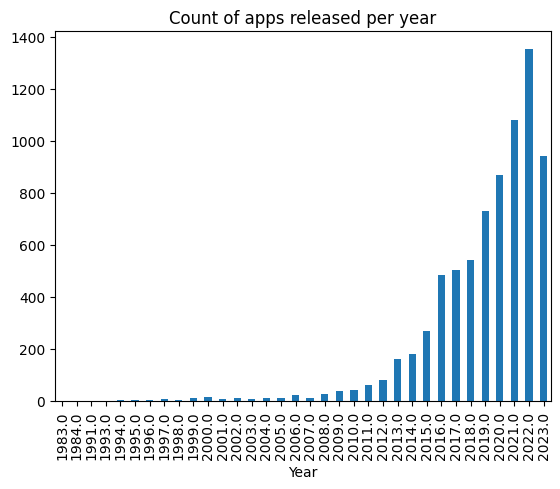

In [17]:
preprocessed_df.groupby('Year')['appid'].count().plot(kind='bar', title='Count of apps released per year');

## Baseline Model

In [18]:
preprocessed_df.head(2)

,Name,Date,Developer,Publisher,Genre,Langs,DLC,Mature,Single,Score,appid,description,Tags,Year
0,Senren＊Banka,2020-02-14,YUZUSOFT,HIKARI FIELD,"['Adventure', 'Casual']","['English', 'Japanese', 'Simplified Chinese', ...",0.0,1.0,1.0,0.963524,1144400,Senren＊Banka is a Japanese-style visual novel ...,"['Visual Novel', 'Casual', 'Adventure', 'Datin...",2020.0
1,A Short Hike,2019-07-30,adamgryu,adamgryu,"['Adventure', 'Indie']","['English', 'French', 'Spanish - Latin America...",0.0,0.0,1.0,0.964582,1055540,"Hike, climb, and soar through the peaceful mou...","['Adventure', 'Exploration', 'Indie', 'Cute', ...",2019.0


In [19]:
from df_preliminary import processing_for_tfidf

In [20]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import string
import re

In [21]:
def data_preprocessing(text: str) -> str:
    """preprocessing string: lowercase, removing html-tags, punctuation and stopwords

    Args:
        text (str): input string for preprocessing

    Returns:
        str: preprocessed string
    """    

    text = text.lower()
    text = re.sub('<.*?>', '', text) # html tags
    text = ''.join([c for c in text if c not in string.punctuation and not c.isdigit()])# Remove punctuation and digits
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text

preprocessed_df['cleaned_tags'] = preprocessed_df['Tags'].apply(data_preprocessing)
preprocessed_df.head(2)

,Name,Date,Developer,Publisher,Genre,Langs,DLC,Mature,Single,Score,appid,description,Tags,Year,cleaned_tags
0,Senren＊Banka,2020-02-14,YUZUSOFT,HIKARI FIELD,"['Adventure', 'Casual']","['English', 'Japanese', 'Simplified Chinese', ...",0.0,1.0,1.0,0.963524,1144400,Senren＊Banka is a Japanese-style visual novel ...,"['Visual Novel', 'Casual', 'Adventure', 'Datin...",2020.0,visual novel casual adventure dating sim anime...
1,A Short Hike,2019-07-30,adamgryu,adamgryu,"['Adventure', 'Indie']","['English', 'French', 'Spanish - Latin America...",0.0,0.0,1.0,0.964582,1055540,"Hike, climb, and soar through the peaceful mou...","['Adventure', 'Exploration', 'Indie', 'Cute', ...",2019.0,adventure exploration indie cute relaxing pixe...


In [22]:
df_tfidf = preprocessed_df.filter(['cleaned_tags'])
df_tfidf.head(2)

,cleaned_tags
0,visual novel casual adventure dating sim anime...
1,adventure exploration indie cute relaxing pixe...


In [23]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler
from scipy.sparse import hstack


# Define the preprocessing steps for text and numeric data
text_preprocessor = TfidfVectorizer()


# Fit and transform the data using vectorizer
processed_data = text_preprocessor.fit_transform(df_tfidf['cleaned_tags'])

# Get the feature names from the text processing step
text_columns = text_preprocessor.get_feature_names_out()

# Create a DataFrame from the processed data
df_processed = pd.DataFrame(processed_data.toarray(), columns=list(text_columns))


In [24]:
df_processed.shape

(7519, 462)

In [25]:
year = [2018]
description = 'Become a master assassin in a dark and immersive world'
genre = 'action, rpg'
user_df = pd.DataFrame({'Vector': [description], 'Year': year, 'Genre': genre})
user_df

,Vector,Year,Genre
0,Become a master assassin in a dark and immersi...,2018,"action, rpg"


In [26]:
user_features = text_preprocessor.transform(user_df['Vector'])
user_columns = text_preprocessor.get_feature_names_out()
user_processed = pd.DataFrame(user_features.toarray(), columns=list(user_columns))
user_processed.head(5)

,abstract,access,action,actionadventure,addictive,adventure,agriculture,aliens,alternate,ambient,...,web,wellwritten,werewolves,western,wholesome,word,workshop,world,wrestling,zombies
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318682,0.0,0.0


In [27]:
selected_columns = user_processed.columns[user_processed.max() > 0]
user_processed_selected = user_processed[selected_columns]
user_processed_selected

,assassin,dark,immersive,world
0,0.723649,0.377683,0.481798,0.318682


In [28]:
# df_processed.iloc[5702][df_processed.iloc[5702] > 0]

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(user_features, processed_data)

df_sc = pd.DataFrame(similarity_scores.reshape(-1,1))
df_sc.sort_values(by = 0, ascending = False)

,0
795,0.551908
89,0.477131
6884,0.449641
3771,0.446394
3738,0.404670
...,...
3001,0.000000
3000,0.000000
2997,0.000000
2996,0.000000


In [30]:
top_5_indices = similarity_scores.argsort()[0][-5:][::-1]
top_5_indices

array([ 795,   89, 6884, 3771, 3738])

In [31]:
user_year = user_df['Year'].iloc[0]  # Extract the user's year from the user_df DataFrame

# filtered_indices = [index for index in top_5_indices]
recommended_games = preprocessed_df.iloc[top_5_indices]

In [32]:
recommended_games[['Name', 'Score', 'Year', 'Tags', 'Genre']].sort_values(by = 'Score', ascending=False).iloc[:5]

,Name,Score,Year,Tags,Genre
89,Dishonored,0.959609,2012.0,"['Stealth', 'First-Person', 'Action', 'Assassi...","['Action', 'Adventure']"
796,Dishonored: The Brigmore Witches,0.894944,2013.0,"['Action', 'Adventure', 'Stealth', 'Steampunk'...","['Action', 'Adventure']"
3746,HITMAN 3,0.818930,2022.0,"['Action', 'Stealth', 'Assassin', 'Sandbox', '...","['Action', 'Adventure']"
3779,Styx: Shards of Darkness,0.801313,2017.0,"['Action', 'Singleplayer', 'Stealth', 'Adventu...","['Action', 'Adventure']"
6898,Assassin’s Creed® Chronicles: Russia,0.591902,2016.0,"['Action', 'Adventure', 'Assassin', '2.5D', 'S...","['Action', 'Adventure']"


In [33]:
recommended_games[['Name', 'Score', 'Year', 'Tags', 'Genre']].iloc[:5]

,Name,Score,Year,Tags,Genre
796,Dishonored: The Brigmore Witches,0.894944,2013.0,"['Action', 'Adventure', 'Stealth', 'Steampunk'...","['Action', 'Adventure']"
89,Dishonored,0.959609,2012.0,"['Stealth', 'First-Person', 'Action', 'Assassi...","['Action', 'Adventure']"
6898,Assassin’s Creed® Chronicles: Russia,0.591902,2016.0,"['Action', 'Adventure', 'Assassin', '2.5D', 'S...","['Action', 'Adventure']"
3779,Styx: Shards of Darkness,0.801313,2017.0,"['Action', 'Singleplayer', 'Stealth', 'Adventu...","['Action', 'Adventure']"
3746,HITMAN 3,0.818930,2022.0,"['Action', 'Stealth', 'Assassin', 'Sandbox', '...","['Action', 'Adventure']"


## Baseline v2 -- content based filtering using TFIDF and BERT

In [34]:
preprocessed_df.head(2)

,Name,Date,Developer,Publisher,Genre,Langs,DLC,Mature,Single,Score,appid,description,Tags,Year,cleaned_tags
0,Senren＊Banka,2020-02-14,YUZUSOFT,HIKARI FIELD,"['Adventure', 'Casual']","['English', 'Japanese', 'Simplified Chinese', ...",0.0,1.0,1.0,0.963524,1144400,Senren＊Banka is a Japanese-style visual novel ...,"['Visual Novel', 'Casual', 'Adventure', 'Datin...",2020.0,visual novel casual adventure dating sim anime...
1,A Short Hike,2019-07-30,adamgryu,adamgryu,"['Adventure', 'Indie']","['English', 'French', 'Spanish - Latin America...",0.0,0.0,1.0,0.964582,1055540,"Hike, climb, and soar through the peaceful mou...","['Adventure', 'Exploration', 'Indie', 'Cute', ...",2019.0,adventure exploration indie cute relaxing pixe...


In [35]:
preprocessed_df['description'] = preprocessed_df['description'].fillna('')

In [36]:
preprocessed_df['cleaned_descriptions'] = preprocessed_df['description'].apply(data_preprocessing)
preprocessed_df.head(2)

,Name,Date,Developer,Publisher,Genre,Langs,DLC,Mature,Single,Score,appid,description,Tags,Year,cleaned_tags,cleaned_descriptions
0,Senren＊Banka,2020-02-14,YUZUSOFT,HIKARI FIELD,"['Adventure', 'Casual']","['English', 'Japanese', 'Simplified Chinese', ...",0.0,1.0,1.0,0.963524,1144400,Senren＊Banka is a Japanese-style visual novel ...,"['Visual Novel', 'Casual', 'Adventure', 'Datin...",2020.0,visual novel casual adventure dating sim anime...,senren＊banka japanesestyle visual novel produc...
1,A Short Hike,2019-07-30,adamgryu,adamgryu,"['Adventure', 'Indie']","['English', 'French', 'Spanish - Latin America...",0.0,0.0,1.0,0.964582,1055540,"Hike, climb, and soar through the peaceful mou...","['Adventure', 'Exploration', 'Indie', 'Cute', ...",2019.0,adventure exploration indie cute relaxing pixe...,hike climb soar peaceful mountainside landscap...


In [37]:
preprocessed_df[['cleaned_descriptions', 'cleaned_tags']]

,cleaned_descriptions,cleaned_tags
0,senren＊banka japanesestyle visual novel produc...,visual novel casual adventure dating sim anime...
1,hike climb soar peaceful mountainside landscap...,adventure exploration indie cute relaxing pixe...
2,return calypso island serve seasonal sundae tr...,cooking strategy time management simulation ca...
3,set delightful expedition use photographic eye...,cozy wholesome adventure puzzle exploration cu...
4,exploration adventure game set creepy mysterio...,horror rpgmaker psychological horror female pr...
...,...,...
7528,,strategy
7529,,early access building survival crafting wester...
7530,,strategy simulation mythology rts
7531,,action hack slash open world historical musou ...


### TFIDF

In [98]:
import pandas as pd
import re
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import BM25

nltk.download('stopwords')
nltk.download('punkt')

class MovieRecommender:

    def __init__(self, filename, columns, t_column, d_column):
        self.filename = filename
        self.columns = columns
        self.title_column = t_column
        self.description_column = d_column
        self.df = None

    def process(self, show=True):
        self.df = pd.read_csv(self.filename)
        self.df = self.df[self.columns]
        self.df[self.description_column].fillna('', inplace=True)
        self.df[self.description_column] = self.df[self.title_column] + '. ' +  self.df[self.description_column].map(str)
        self.df.dropna(inplace=True)
        self.df.drop_duplicates(inplace=True)
        return self.df

    def show_df_records(self, n = 5):
        return self.df.head(n)

    def show_info_details(self):
        return self.df.info()

    def __normalize(self, d):
        stopwords = nltk.corpus.stopwords.words('english')
        d = re.sub(r'[^a-zA-Z0-9\s]', '', d, re.I|re.A)
        d = d.lower().strip()
        tks = nltk.word_tokenize(d)
        f_tks = [t for t in tks if t not in stopwords]
        return ' '.join(f_tks)

    def get_normalized_corpus(self, tokens = False):
        n_corpus = np.vectorize(self.__normalize)        
        if tokens == True:
            norm_courpus = n_corpus(list(self.df[self.description_column]))
            return np.array([nltk.word_tokenize(d) for d in norm_courpus])            
        else:
            return n_corpus(list(self.df[self.description_column]))
            
    def get_features(self, norm_corpus):
        tf_idf = TfidfVectorizer(ngram_range=(1,2), min_df=2)
        tfidf_array = tf_idf.fit_transform(norm_corpus)
        return tfidf_array
    
    def get_vector_cosine(self, tfidf_array):
        return pd.DataFrame(cosine_similarity(tfidf_array))

    def get_bm25_weights(self, corpus):

        bm25 = BM25(corpus)
        avg_idf = sum(float(val) for val in bm25.idf.values()) / len(bm25.idf)

        weights = []
        for doc in corpus:
            scores = bm25.get_scores(doc, avg_idf)
            weights.append(scores)

        return pd.DataFrame(weights)
        
    def get_bert_weights(self, corpus):
        model = SentenceTransformer('prajjwal1/bert-tiny')
        vectors = model.encode(corpus)
        weights = pd.DataFrame(cosine_similarity(vectors))
        
        return weights
    
    def search_movies_by_term(self, term='movie'):
        movies = self.df[self.title_column].values
        possible_options = [(i, movie) for i, movie in enumerate(movies) for word in movie.split(' ') if word == term]
        return possible_options
    
    def recommendation(self, index, vector, n):
        similarities = vector.iloc[index].values
        similar_indices = np.argsort(-similarities)[1:n + 1]
        movies = self.df[self.title_column].values
        similar_movies =  movies[similar_indices]
        return similar_movies
    
    def __normalize_text(self, text):
        stopwords = nltk.corpus.stopwords.words('english')
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text, re.I | re.A)
        text = text.lower().strip()
        tokens = nltk.word_tokenize(text)
        filtered_tokens = [t for t in tokens if t not in stopwords]
        return ' '.join(filtered_tokens)

    def normalize_input_text(self, text):
        return self.__normalize_text(text)

    def recommend_movies_by_text(self, input_text, n=5):
        normalized_input = self.__normalize_text(input_text)

        # Get the features
        corpus = list(self.df[self.description_column])
        corpus.append(normalized_input)
        model = SentenceTransformer('prajjwal1/bert-tiny')
        vectors = model.encode(corpus)
        
        # Calculate cosine similarity
        similarities = cosine_similarity(vectors[:-1], vectors[-1].reshape(1, -1))
        similar_indices = np.argsort(-similarities.flatten())[:n]
        movies = self.df[self.title_column].values
        recommended_movies = movies[similar_indices]
        
        return recommended_movies

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vasevooo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vasevooo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [99]:
FILENAME = 'data/games_with_eng_descriptions_clear.csv'
gr = MovieRecommender(FILENAME, ['Name', 'description'], 'Name', 'description')
df = gr.process()
gr.show_df_records(5)

,Name,description
0,Senren＊Banka,Senren＊Banka. Senren＊Banka is a Japanese-style...
1,A Short Hike,"A Short Hike. Hike, climb, and soar through th..."
2,Papa's Freezeria Deluxe,Papa's Freezeria Deluxe. Return to Calypso Isl...
3,TOEM,TOEM. Set off on a delightful expedition and u...
4,Ib,Ib. A 2D exploration adventure game set in a c...


In [89]:
norm_corpus = gr.get_normalized_corpus()
type(norm_corpus)


numpy.ndarray

In [41]:
tfidf_array = gr.get_features(norm_corpus)
tfidf_array.shape


(4523, 15390)

In [42]:
vector_cosine = gr.get_vector_cosine(tfidf_array)
vector_cosine.head()

,0,1,2,3,4,5,6,7,8,9,...,4513,4514,4515,4516,4517,4518,4519,4520,4521,4522
0,1.000000,0.000000,0.000000,0.022894,0.053318,0.003782,0.003606,0.020545,0.014991,0.003738,...,0.0,0.0,0.000000,0.0,0.003284,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,1.000000,0.000000,0.099145,0.000000,0.000000,0.000000,0.064578,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,1.000000,0.042391,0.000000,0.000000,0.000000,0.019330,0.033207,0.000000,...,0.0,0.0,0.061445,0.0,0.000000,0.094085,0.000000,0.0,0.0,0.0
3,0.022894,0.099145,0.042391,1.000000,0.104703,0.018030,0.003827,0.066242,0.025383,0.003968,...,0.0,0.0,0.000000,0.0,0.003486,0.000000,0.019991,0.0,0.0,0.0
4,0.053318,0.000000,0.000000,0.104703,1.000000,0.007559,0.007207,0.027994,0.017831,0.007472,...,0.0,0.0,0.000000,0.0,0.006563,0.000000,0.000000,0.0,0.0,0.0


In [43]:
gr.search_movies_by_term('Assassins')


[]

In [44]:
games_recommended  = gr.recommendation(19, vector_cosine, 3)
print(games_recommended)


['Portal Dungeon' 'Bridge Constructor Portal - Portal Proficiency'
 'AI: THE SOMNIUM FILES –nirvanA Initiative– Complete Soundtrack']


In [45]:
df[df['Name'] == 'Battlestar Galactica Deadlock: Resurrection' ].values


array([['Battlestar Galactica Deadlock: Resurrection',
        'Battlestar Galactica Deadlock: Resurrection. Battlestar Galactica Deadlock Resurrection marks the beginning of Season Two and introduces a plethora of new features and content. Two new ships (including the much awaited Jupiter MK II Battlestar), two new squadrons, and a new story campaign told from the CIC deck of the Galactica itself.']],
      dtype=object)

### Bert

In [65]:
wts_df = gr.get_bert_weights(norm_corpus)
wts_df.shape

/Users/vasevooo/projects/GameBuddy/steam/lib/python3.9/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


(4523, 4523)

In [67]:
wts_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,4513,4514,4515,4516,4517,4518,4519,4520,4521,4522
0,1.000000,0.280936,0.447123,0.435543,0.313667,0.397967,0.293897,0.468377,0.489640,0.365269,...,0.302206,0.450740,0.466441,0.470756,0.569421,0.482314,0.411137,0.495735,0.356095,0.400887
1,0.280936,1.000000,0.261262,0.434001,0.177388,0.216756,0.104687,0.319441,0.304719,0.112234,...,0.130637,0.281413,0.274457,0.307011,0.255341,0.276096,0.309078,0.195614,0.310284,0.251526


In [103]:
games_recommended  = gr.recommendation(19, wts_df, 5)
print(games_recommended)

['Castlevania: Lords of Shadow 2 - Revelations DLC'
 'Quern - Undying Thoughts' 'Masterplan Tycoon' "Wilmot's Warehouse"
 'CONVERGENCE: A League of Legends Story™']


In [102]:
input_text = "Amazing open world RPG"
recommended_movies = gr.recommend_movies_by_text(input_text, n=5)
print(recommended_movies)

No sentence-transformers model found with name /Users/vasevooo/.cache/torch/sentence_transformers/prajjwal1_bert-tiny. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/vasevooo/.cache/torch/sentence_transformers/prajjwal1_bert-tiny were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializ

['171' 'UnReal World' 'Space Rangers HD: A War Apart' 'Tabletop Creator'
 'Lakeview Cabin Collection']


In [3]:
from notebooks.Game_recomender import GameRecommender

/Users/vasevooo/projects/GameBuddy/steam/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/vasevooo/projects/GameBuddy/steam/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
FILENAME = 'data/games_with_eng_descriptions_clear.csv'
gr = GameRecommender(FILENAME, ['Name', 'description'], 'Name', 'description')
df = gr.process()
df.shape

No sentence-transformers model found with name /Users/vasevooo/.cache/torch/sentence_transformers/prajjwal1_bert-tiny. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/vasevooo/.cache/torch/sentence_transformers/prajjwal1_bert-tiny were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializ

(4523, 2)

In [6]:
norm_corpus = gr.get_normalized_corpus()

In [21]:
norm_corpus[1]

'short hike hike climb soar peaceful mountainside landscapes hawk peak provincial park make way summit'

In [7]:
wts_df = gr.get_bert_weights(norm_corpus)
wts_df.shape

/Users/vasevooo/projects/GameBuddy/steam/lib/python3.9/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


(4523, 4523)

In [23]:
wts_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,4513,4514,4515,4516,4517,4518,4519,4520,4521,4522
0,1.000000,0.652530,0.809867,0.821929,0.806832,0.739375,0.721654,0.807222,0.806892,0.754687,...,0.743305,0.817517,0.727032,0.842032,0.841262,0.795256,0.711865,0.798940,0.720405,0.743115
1,0.652530,1.000000,0.683167,0.698307,0.660573,0.523879,0.613297,0.729346,0.755178,0.638887,...,0.572258,0.691730,0.570906,0.683496,0.676728,0.583479,0.601420,0.664289,0.585567,0.603077
2,0.809867,0.683167,1.000000,0.799173,0.682364,0.755584,0.755682,0.810311,0.798801,0.750092,...,0.753540,0.735747,0.787186,0.842641,0.823436,0.813826,0.653270,0.737254,0.712354,0.803596
3,0.821929,0.698307,0.799173,1.000000,0.854945,0.851384,0.829334,0.848939,0.894287,0.823097,...,0.603104,0.794796,0.736513,0.871377,0.796265,0.811237,0.814684,0.799570,0.757805,0.774945
4,0.806832,0.660573,0.682364,0.854945,1.000000,0.740735,0.782848,0.785128,0.822482,0.771569,...,0.610536,0.772745,0.709266,0.770977,0.800874,0.777911,0.815430,0.764464,0.712858,0.741842


In [8]:
input_text = "Amazing open world RPG!"
recommended_games = gr.recommend_games_by_text(input_text, n=5)
print(f'for a query "{input_text}" the list of games is the following: \n{recommended_games}')

for a query "Amazing open world RPG!" the list of games is the following: 
171
UnReal World
Space Rangers HD: A War Apart
Tabletop Creator
Lakeview Cabin Collection


In [143]:
type(recommended_games)

str

In [16]:
df[df['Name'] == '171']['description'].values

array(['171. 171 is an open world action adventure game with a Brazilian inspired ambience.'],
      dtype=object)